In [155]:
train_df = pd.read_csv("../../data/datasets/default/20170416.csv")
train_df.head()

,Fri,Mon,Sat,Sun,Thurs,Tue,Wed,degree_mean,degree_mean_shift1,degree_std,...,overall_dir_right_down,overall_dir_right_up,right,right_down,right_up,up,var,var_shift1,vertical,prev_acc_cnt
0,0,0,0,1,0,0,0,125.666667,-27.054264,115.604553,...,0,0,0.333333,0.071429,0.119048,0.000000,22.5958,21.1866,0.000000,0
1,0,0,0,1,0,0,0,130.590909,4.924242,118.552504,...,0,0,0.295455,0.136364,0.113636,0.000000,26.3131,3.7173,0.022727,0
2,0,0,0,1,0,0,0,146.083333,15.492424,137.548855,...,0,0,0.361111,0.111111,0.222222,0.027778,27.2595,0.9464,0.027778,0
3,0,0,0,1,0,0,0,154.648649,8.565315,125.963362,...,0,0,0.324324,0.054054,0.189189,0.000000,26.6687,-0.5908,0.000000,0
4,0,0,0,1,0,0,0,118.275862,-36.372787,104.465436,...,0,0,0.241379,0.206897,0.068966,0.000000,33.2341,6.5654,0.000000,0


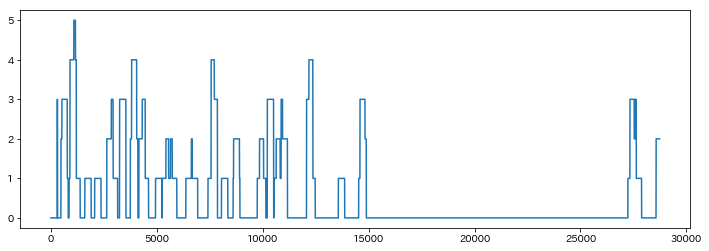

In [156]:
plt.figure(figsize=(12, 4))
plt.plot(list(train_df["prev_acc_cnt"]))

In [49]:
np.unique(train_df["label"])

array([1, 2, 3, 4, 5])

In [50]:
def prev_acc(df, width=60*5):
    acc_df = pd.Series([0 for _ in range(len(df))])
    for i in range(width, len(df)):
        acc_df[i] = np.sum(df.iloc[i-width:i-1]["label"] == 5)
    return acc_df

In [51]:
acc_df = prev_acc(train_df)
train_df["prev_acc_cnt"] = acc_df

In [52]:
train_df.head()

,mean,var,max,degree_mean,degree_std,down,horizontal,left,left_down,left_up,...,Wed,Thurs,Fri,Sat,mean_shift1,var_shift1,max_shift1,degree_mean_shift1,degree_std_shift1,prev_acc_cnt
0,29.6173,22.5958,69.2766,125.666667,115.604553,0.000000,0.642857,0.309524,0.119048,0.047619,...,0,0,0,0,27.82087,21.1866,65.15349,-27.054264,0.603173,0
1,27.0710,26.3131,70.2337,130.590909,118.552504,0.022727,0.500000,0.204545,0.090909,0.136364,...,0,0,0,0,-2.54630,3.7173,0.95710,4.924242,2.947951,0
2,32.6868,27.2595,72.9634,146.083333,137.548855,0.000000,0.472222,0.111111,0.000000,0.166667,...,0,0,0,0,5.61580,0.9464,2.72970,15.492424,18.996351,0
3,29.7387,26.6687,69.1588,154.648649,125.963362,0.000000,0.567568,0.243243,0.027027,0.162162,...,0,0,0,0,-2.94810,-0.5908,-3.80460,8.565315,-11.585493,0
4,26.2518,33.2341,73.5575,118.275862,104.465436,0.000000,0.413793,0.172414,0.068966,0.241379,...,0,0,0,0,-3.48690,6.5654,4.39870,-36.372787,-21.497925,0


In [82]:
mean_df = pd.read_csv("../../data/statistics/20170416/9/mean.csv")
print(len(mean_df))
mean_df.tail()

107850


,mean,frame_num
107845,29.3657,107966
107846,27.3111,107967
107847,29.3206,107968
107848,27.5261,107969
107849,29.4173,107970


In [104]:
human_df = pd.read_csv("../../data/human_area/20170416/9.csv")
print(len(human_df))
human_df.head()

3594


,human_area,frame_num
0,0.000060,121
1,0.000060,122
2,0.000045,123
3,0.000091,124
4,0.000106,125


In [143]:
# FIX human_area index

# date = "20181031"

# for time in range(9, 17):
#     mean_df = pd.read_csv("../../data/statistics/{}/{}/mean.csv".format(date, time))
#     human_df = pd.read_csv("../../data/human_area/{}/{}.csv".format(date, time))

#     human_arr = np.zeros(len(mean_df))
#     val_arr = np.array(human_df["human_area"])

#     fix_df = pd.DataFrame(columns=["human_area", "frame_num"])
#     fix_df["frame_num"] = [i for i in range(121, len(mean_df)+121)]

#     for i in range(0, len(val_arr)*30, 30):
#         human_arr[i:i+30] = val_arr[int(i/30)]

#     fix_df["human_area"] = human_arr
#     fix_df = fix_df[:len(val_arr)*30]
#     fix_df.to_csv("../../data/human_area/{}/{}.csv".format(date, time), index=False)